In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

In [5]:
heart_df = pd.read_csv('dataset.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
heart_df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

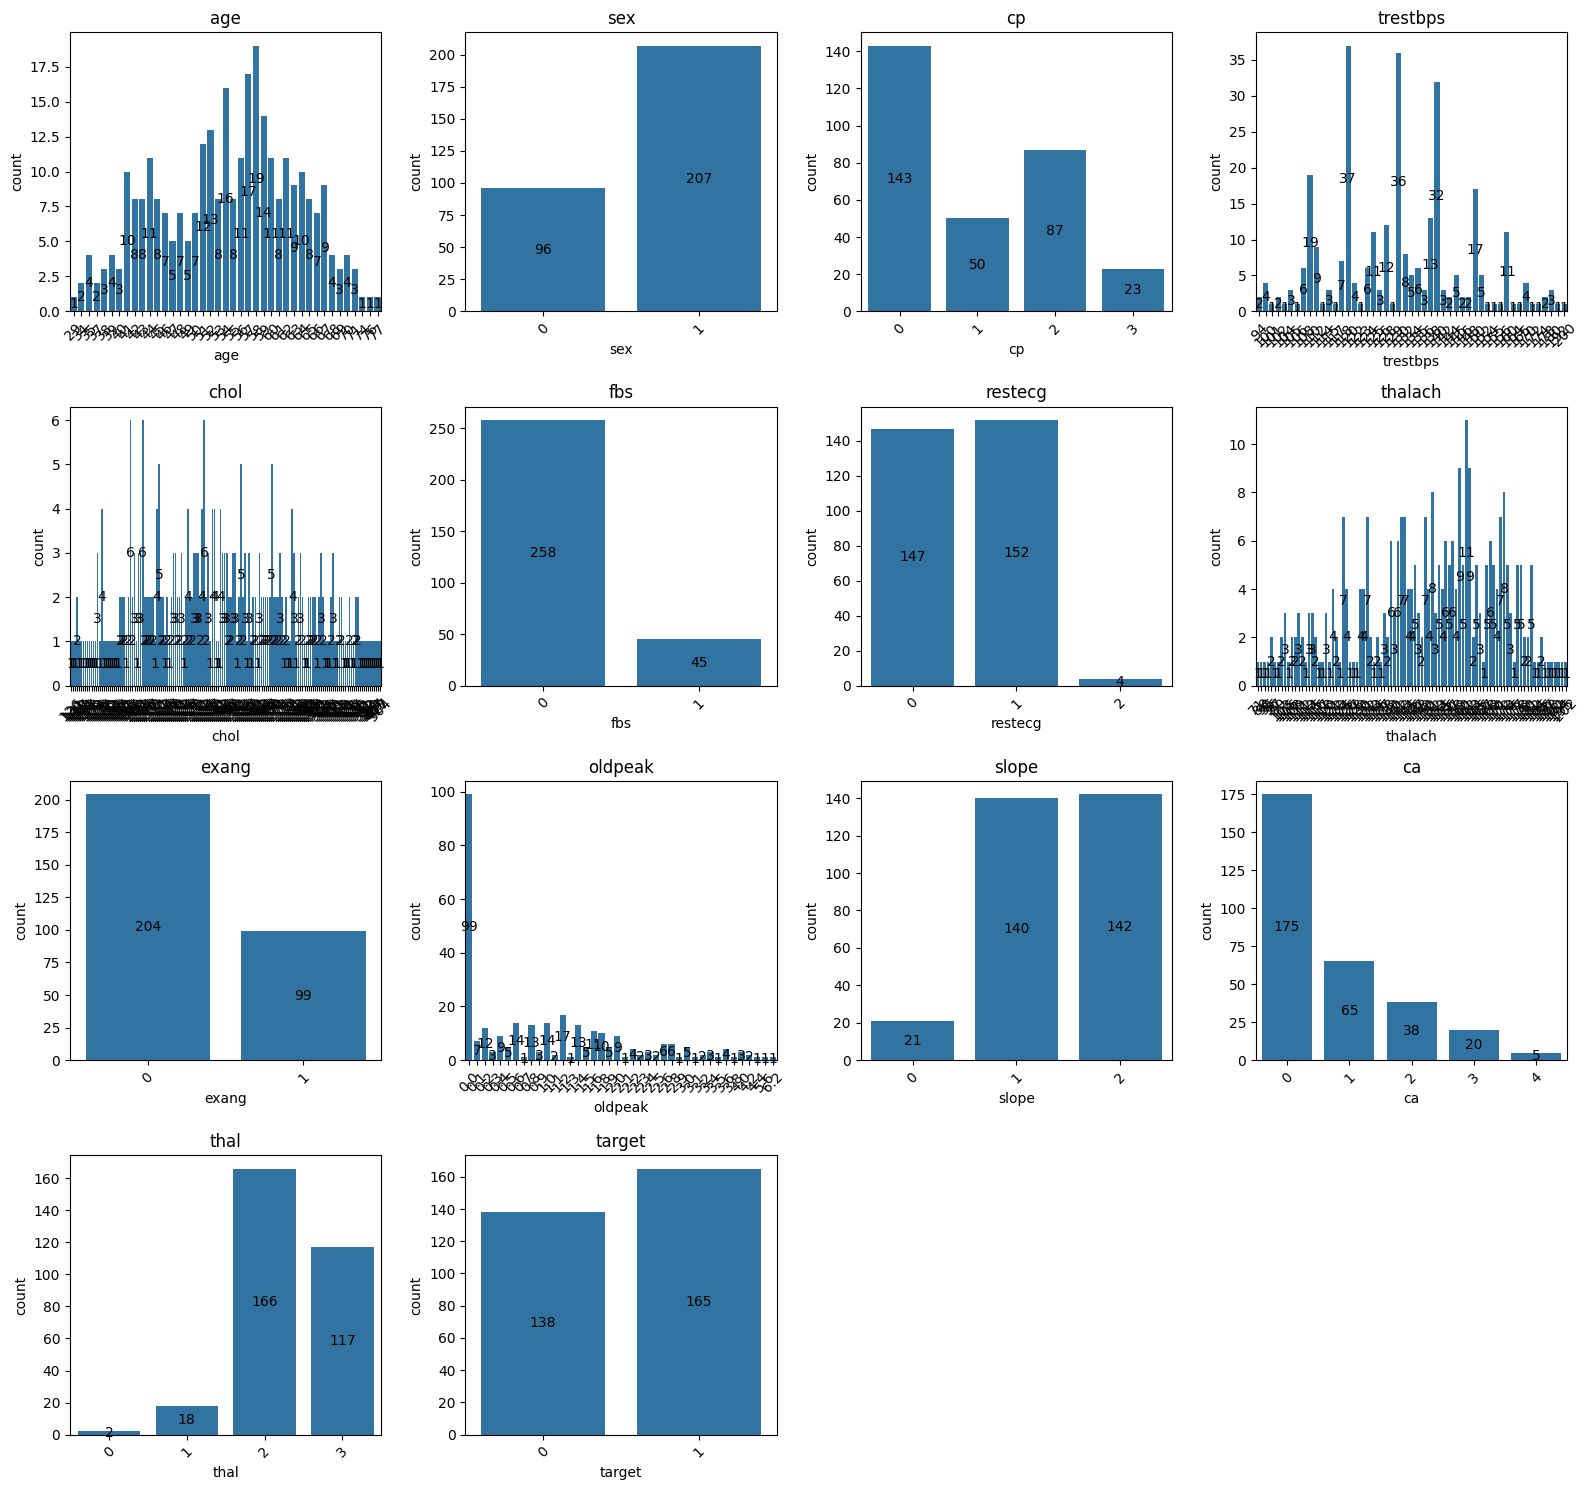

In [9]:
categorical_cols= ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

fig = plt.figure(figsize=(16, 15))

for idx, col in enumerate(categorical_cols):
   # ax = plt.subplot(4, 2, idx+1)
    ax = plt.subplot(4, 4, idx+1)
    sns.countplot(x=heart_df[col], ax=ax) #count plot shows how many values are corresponding to each row
    #add data labels to each bar
    ax.set_title(col)
    
    for container in ax.containers:
        ax.bar_label(container, label_type="center", fontsize=10)

    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

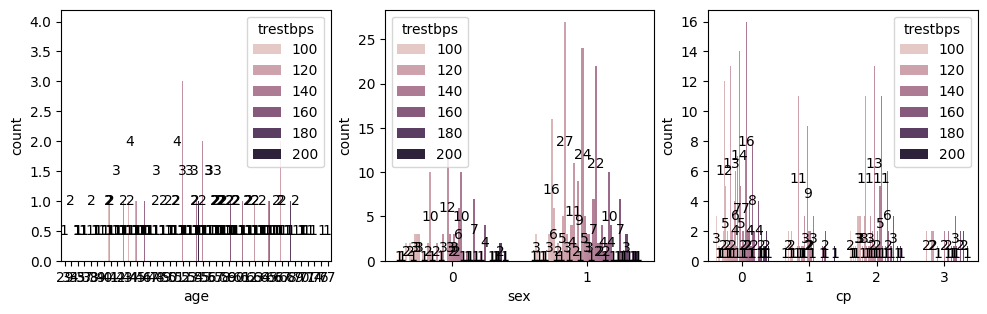

In [10]:
fig = plt.figure(figsize=(16,15))

for idx, col in enumerate(categorical_cols[0:3]):
    ax = plt.subplot(4,4, idx+1)
    #Group by Heartdisease
    sns.countplot(x=heart_df[col], hue=heart_df["trestbps"], ax=ax)
    #add data labels to each bar
    for container in ax.containers:
        ax.bar_label(container, label_type="center")

In [11]:
heart_df[heart_df['ca']==0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 175 entries, 0 to 299
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       175 non-null    int64  
 1   sex       175 non-null    int64  
 2   cp        175 non-null    int64  
 3   trestbps  175 non-null    int64  
 4   chol      175 non-null    int64  
 5   fbs       175 non-null    int64  
 6   restecg   175 non-null    int64  
 7   thalach   175 non-null    int64  
 8   exang     175 non-null    int64  
 9   oldpeak   175 non-null    float64
 10  slope     175 non-null    int64  
 11  ca        175 non-null    int64  
 12  thal      175 non-null    int64  
 13  target    175 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 20.5 KB


In [62]:
heart_df[heart_df['fbs']==0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 258 entries, 1 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       258 non-null    int64  
 1   sex       258 non-null    int64  
 2   cp        258 non-null    int64  
 3   trestbps  258 non-null    int64  
 4   chol      258 non-null    int64  
 5   fbs       258 non-null    int64  
 6   restecg   258 non-null    int64  
 7   thalach   258 non-null    int64  
 8   exang     258 non-null    int64  
 9   oldpeak   258 non-null    float64
 10  slope     258 non-null    int64  
 11  ca        258 non-null    int64  
 12  thal      258 non-null    int64  
 13  target    258 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 30.2 KB


In [12]:
heart_df[heart_df['exang']==0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       204 non-null    int64  
 1   sex       204 non-null    int64  
 2   cp        204 non-null    int64  
 3   trestbps  204 non-null    int64  
 4   chol      204 non-null    int64  
 5   fbs       204 non-null    int64  
 6   restecg   204 non-null    int64  
 7   thalach   204 non-null    int64  
 8   exang     204 non-null    int64  
 9   oldpeak   204 non-null    float64
 10  slope     204 non-null    int64  
 11  ca        204 non-null    int64  
 12  thal      204 non-null    int64  
 13  target    204 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 23.9 KB


In [13]:
df_clean = heart_df.copy()

df_clean = df_clean[df_clean["exang"] !=0]

heartdisease_mask = df_clean["exang"]==0

ca_without_heartdisease = df_clean.loc[heartdisease_mask, "ca"]
ca_with_heartdisease = df_clean.loc[heartdisease_mask, "ca"]

df_clean.loc[heartdisease_mask, "ca"] = ca_without_heartdisease.replace(to_replace = 0, value = ca_without_heartdisease.median())
df_clean.loc[heartdisease_mask, "ca"]=  ca_with_heartdisease.replace(to_replace = 0, value = ca_with_heartdisease.median())




In [14]:
df_clean[["exang", "ca"]].describe()

,exang,ca
count,99.0,99.000000
mean,1.0,0.898990
std,0.0,0.994833
min,1.0,0.000000
25%,1.0,0.000000
50%,1.0,1.000000
75%,1.0,1.500000
max,1.0,4.000000


In [16]:
#converting everything to newmeric since knn only works with distance from points.
df_clean = pd.get_dummies(df_clean, drop_first = True)
df_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2,1
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2,1
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1


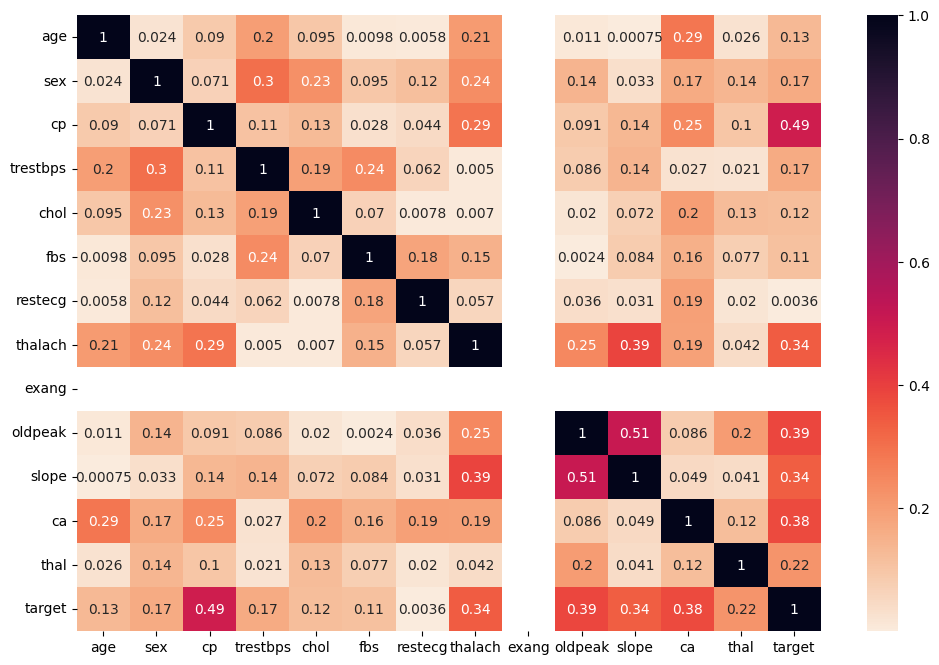

In [18]:
#calculating correlation values.
#this helps us know the strength of the correlation
correlations = abs (df_clean.corr())
plt.figure(figsize=(12,8))
sns.heatmap(correlations, annot=True, cmap="rocket_r")

plt.show()

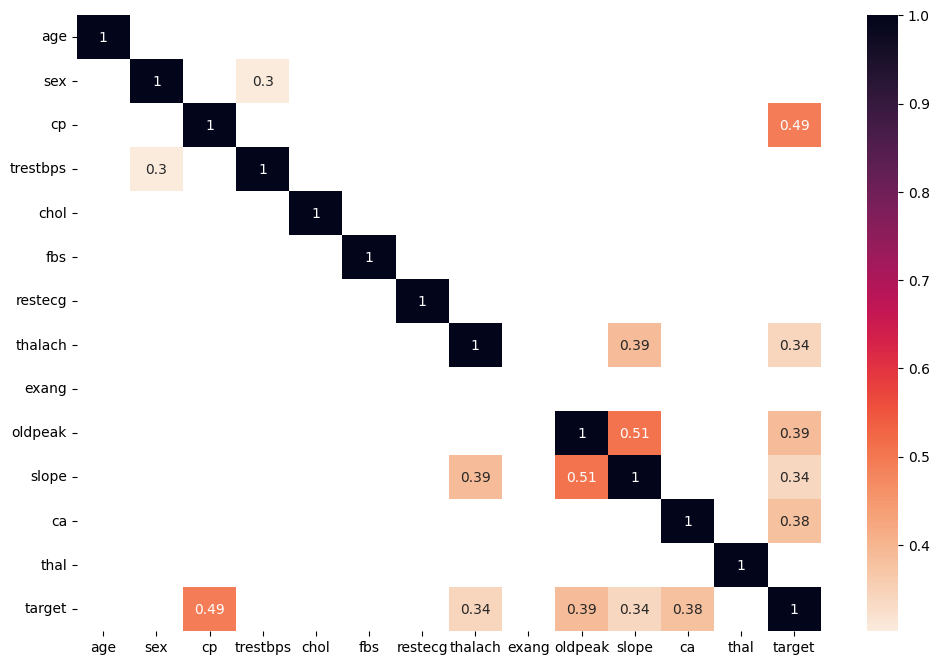

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(correlations[correlations > 0.30], annot=True, cmap="rocket_r")

plt.show()

In [ ]:
#Now we are going to officially begin building our classiffier
#This where machine Learning begins

In [26]:
#splitting train/test sets
x = df_clean.drop(["exang"], axis=1) #non target variables
y = df_clean["exang"]   #target variables

x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.15, random_state = 417)

features = [
    "age",
    "sex",
    "cp",
    "chol",
    "slope"
]

for feature in features:
    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(x_train[[feature]], y_train)
    accuracy = knn.score(x_val[[feature]], y_val)
    print(f"The k-NN classifier trained on {feature} and with k=3 has an accuracy of {accuracy*100:.2f}% ")

The k-NN classifier trained on age and with k=3 has an accuracy of 100.00% 
The k-NN classifier trained on sex and with k=3 has an accuracy of 100.00% 
The k-NN classifier trained on cp and with k=3 has an accuracy of 100.00% 
The k-NN classifier trained on chol and with k=3 has an accuracy of 100.00% 
The k-NN classifier trained on slope and with k=3 has an accuracy of 100.00% 


In [27]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train[features])
x_val_scaled = scaler.transform(x_val[features])

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train_scaled, y_train)
accuracy = knn.score(x_val_scaled, y_val)
print(f"Accuracy: {accuracy*100:.2f}")

Accuracy: 100.00


In [36]:
x = df_clean.drop(["exang"], axis=1)
y = df_clean["exang"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=417)

features =[
     "age",
   # "sex",
    "cp",
   "chol",
    "slope"
]

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train[features])
x_train_scaled

array([[0.5       , 0.        , 1.        , 0.5       ],
       [0.83333333, 0.66666667, 0.42386831, 0.5       ],
       [0.5       , 0.        , 0.34156379, 0.5       ],
       [0.5952381 , 0.        , 0.16460905, 0.5       ],
       [0.11904762, 0.        , 0.00411523, 0.5       ],
       [0.38095238, 0.        , 0.54320988, 0.5       ],
       [0.47619048, 0.        , 0.20987654, 0.        ],
       [0.        , 0.        , 0.13168724, 0.5       ],
       [0.76190476, 0.        , 0.25925926, 0.5       ],
       [0.30952381, 0.        , 0.37037037, 1.        ],
       [0.4047619 , 0.        , 0.36625514, 1.        ],
       [0.52380952, 0.        , 0.4526749 , 0.5       ],
       [0.19047619, 0.        , 0.33333333, 0.5       ],
       [0.5       , 0.        , 0.48148148, 0.        ],
       [0.5952381 , 0.        , 0.35802469, 1.        ],
       [1.        , 0.        , 0.56790123, 1.        ],
       [0.5       , 0.        , 0.07407407, 0.5       ],
       [0.16666667, 0.        ,

In [37]:
grid_params = {"n_neighbors" : range(1, 20),
                "metric": ["minkowski", "manhattan"]
              }
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, grid_params, scoring='accuracy')
knn_grid.fit(x_train_scaled, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",KNeighborsClassifier()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'metric': ['minkowski', 'manhattan'], 'n_neighbors': range(1, 20)}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",None
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also disp

In [38]:
knn_grid.best_score_*100, knn_grid.best_params_

(np.float64(100.0), {'metric': 'minkowski', 'n_neighbors': 1})

In [ ]:
#Using our test data testing accuracy of the parameters we have.b

In [48]:
x_test_scaled = scaler.transform(x_test[features])
predictions = knn_grid.best_estimator_.predict(x_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy on test set: {accuracy*100:.2f}")

Model Accuracy on test set: 100.00


In [50]:
# Checking data distribution
#This is done when test is better than training results
print("Distribution of patients by their sex in the entire dataset")
print (x.sex.value_counts())

print("\nDistribution of patients by their sex in the training dataset")
print(x_train.sex.value_counts())

print("\nDistribution of patients by their sex in the test dataset")
print(x_test.sex.value_counts())

Distribution of patients by their sex in the entire dataset
sex
1    77
0    22
Name: count, dtype: int64

Distribution of patients by their sex in the training dataset
sex
1    64
0    20
Name: count, dtype: int64

Distribution of patients by their sex in the test dataset
sex
1    13
0     2
Name: count, dtype: int64


C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:620: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


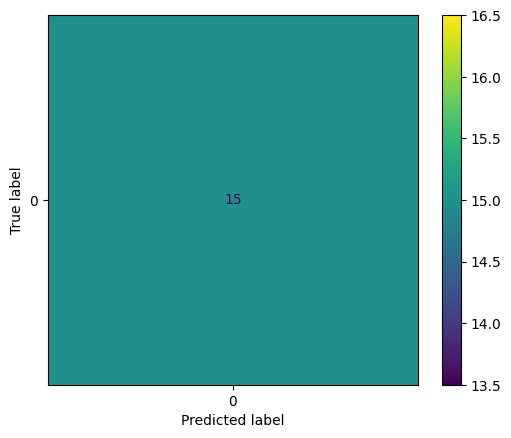

In [52]:
cf = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(cf).plot()
plt.show()